In [7]:
import os
import geopandas as gpd
import pandas as pd
import csv
from shapely.geometry import Point, LineString


os.chdir('/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/Data')
gdf0 = gpd.GeoDataFrame(gpd.read_file("ECMC_Flowline_Data_Access/COGCC_Form44_Off_Location_Flowlines_Approved_CONFIDENTIAL.gdb"))
gdf1 = gpd.GeoDataFrame(gpd.read_file("ECMC_Flowline_Data_Access/COGCC_Form44_Crude_Oil_Produced_Water_Transfer_Flowlines_Approved_CONFIDENTIAL.gdb"))
flowlines = pd.read_excel('FlowlineSpreadsheet_Mines.xlsx')
spills = pd.read_excel('Flowline-Related Spills (2022).xlsx')

Combine both gbd files

In [ ]:
# Check if the CRS of gdf0 is different from that of gdf1
if gdf0.crs != gdf1.crs:
    # If true, convert the CRS of gdf1 to match that of gdf0, modifying gdf1 in place
    gdf1.to_crs(gdf.crs, inplace=True)

# Concatenate gdf0 and gdf1 into a single GeoDataFrame, ignoring the original indices to create a new continuous index
gdf = pd.concat([gdf0,gdf1],ignore_index=True)
gdf.head(1)

Transform excel files into gbd files

<Axes: >

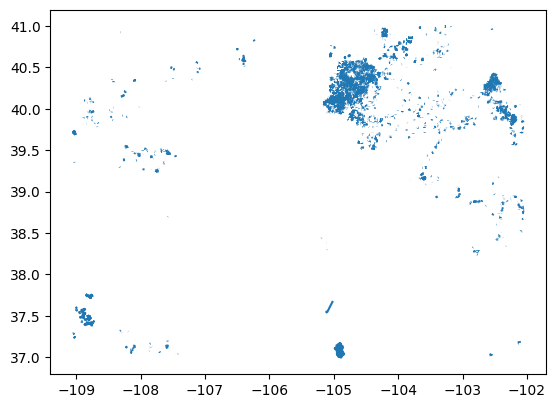

In [8]:
# Check if the 'geometry' column does not exist in the flowlines DataFrame and initialize it as an empty string if true
if 'geometry' not in flowlines.columns:
    flowlines['geometry'] = ''

# Iterate over each row in the flowlines DataFrame
for index, row in flowlines.iterrows():
    # Create a LineString geometry from the start and end coordinates of each flowline
    geom = LineString([(row['STARTLONG'],row['STARTLAT']),(row['ENDLONG'],row['ENDLAT'])])
    # Assign the created LineString geometry to the 'geometry' column at the current index
    flowlines.at[index,'geometry'] = geom

# Convert the flowlines DataFrame into a GeoDataFrame, explicitly setting the 'geometry' column and the Coordinate Reference System (CRS) to 'EPSG:4326' (WGS 84)
fl_gdf = gpd.GeoDataFrame(flowlines, geometry='geometry', crs='EPSG:4326')
fl_gdf.plot()

In [9]:
# Check if the CRS of fl_gdf is different from that of gdf
if fl_gdf.crs != gdf.crs:
    # If true, convert the CRS of fl_gdf to match that of gdf, modifying fl_gdf in place
    fl_gdf.to_crs(gdf.crs, inplace=True)
    print('Change fl crs to gdf crs')

Change fl crs to gdf crs


In [10]:
spills.columns

Index([                'trkg_num',            'Operator Name',
                   'operator_num',            'incident_date',
                  'facility_type',               'Spill_Desc',
                         'county',               'Spill Type',
                     'Root Cause',     'Preventative Measure',
                'Root Cause Type', 'Detailed Root Cause Type',
                           'Long',                      'Lat',
                    'oil_spilled',            'oil_recovered',
                   'cond_spilled',           'cond_recovered',
                     'PW_spilled',             'PW_recovered',
               'drilling_spilled',       'drilling_recovered',
                   'frac_spilled',           'frac_recovered',
                  'other_spilled',          'other_recovered',
          'other_spilled_specify',          'facility_status',
                          'Basin',               'Gathering?',
                      'Metallic?',                     

In [11]:
# Set pandas display options to ensure that all DataFrame columns are displayed, regardless of the number of columns
pd.options.display.max_columns = None

# Convert 'spills' DataFrame to GeoDataFrame 'spl_gdf' with Point geometries from 'Long' and 'Lat', setting CRS to 'EPSG:4326'.
spl_gdf = gpd.GeoDataFrame(spills, geometry=gpd.points_from_xy(spills.Long,spills.Lat), crs='EPSG:4326')
spl_gdf.head(2)

,trkg_num,Operator Name,operator_num,incident_date,facility_type,Spill_Desc,county,Spill Type,Root Cause,Preventative Measure,Root Cause Type,Detailed Root Cause Type,Long,Lat,oil_spilled,oil_recovered,cond_spilled,cond_recovered,PW_spilled,PW_recovered,drilling_spilled,drilling_recovered,frac_spilled,frac_recovered,other_spilled,other_recovered,other_spilled_specify,facility_status,Basin,Gathering?,Metallic?,NaN,nan.1,On Location?,Fac or Loc ID,geometry
0,400768997,PETRON DEVELOPMENT COMPANY,69760,42005,WELL,A backup restraint that keeps our drive head o...,WASHINGTON,NaN,A backup restraint that keeps our drive head o...,We replaced the restraining chain with a heavi...,Incorrect Operation,Improper Procedures,-102.84418,40.14439,1.0,NaN,0.0,NaN,40.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,DENVER JULESBURG BASIN,Non-Gathering,Unknown,NaN,NaN,NaN,NaN,POINT (-102.84418 40.14439)
1,400763041,PIONEER NATURAL RESOURCES USA INC,10084,42006,WATER GATHERING SYSTEM/LINE,One inch valve on the waterline inside the met...,LAS ANIMAS,NaN,One inch valve on the waterline inside the met...,The valve has been replaced and everything is ...,Natural Force Damage,Valve Freeze,-104.90956,37.19037,0.0,NaN,0.0,NaN,20.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,RATON BASIN,Non-Gathering,Unknown,NaN,NaN,NaN,NaN,POINT (-104.90956 37.19037)


Download all new gbd files

In [14]:
# Define the path to your output File Geodatabase (ensure the directory exists)
output_gdb_path = "/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/Data/flowlines.gdb"

# Export the GeoDataFrame to the File Geodatabase
fl_gdf.to_file(driver='FileGDB', filename=output_gdb_path)

DriverError: unsupported driver: 'FileGDB'